In [1]:
import pandas as pd

In [3]:
checkouts = pd.read_csv("checkout.csv")
cart = pd.read_csv("cart.csv")
visits = pd.read_csv("visits.csv")
purchase = pd.read_csv("purchase.csv")

In [5]:
checkouts.head()

,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [16]:
checkouts.shape

(360, 2)

In [18]:
cart.shape

(348, 2)

In [7]:
cart.head()

,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [20]:
visits.shape

(2000, 2)

In [10]:
visits.head()

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [22]:
purchase.shape

(252, 2)

In [24]:
purchase.head()

,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


In [50]:
v_cart = pd.merge(visits, cart, how="left",left_on="user_id", right_on="user_id")
v_cart

,user_id,visit_time,cart_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaN
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaN
...,...,...,...
1995,33913ac2-03da-45ae-8fc3-fea39df827c6,2017-03-25 03:29:00,NaN
1996,4f850132-b99d-4623-80e6-6e61d003577e,2017-01-08 09:57:00,NaN
1997,f0830b9b-1f5c-4e74-b63d-3f847cc6ce70,2017-09-07 12:56:00,NaN
1998,b01bffa7-63ba-4cd3-9d93-eb1477c23831,2017-07-20 04:37:00,NaN


In [52]:
v_cart.isna().sum()

user_id          0
visit_time       0
cart_time     1652
dtype: int64

In [54]:
v_cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     2000 non-null   object
 1   visit_time  2000 non-null   object
 2   cart_time   348 non-null    object
dtypes: object(3)
memory usage: 47.0+ KB


In [56]:
v_cart_records = v_cart.shape[0]

In [58]:
v_cart_records

2000

In [62]:
Percent_value_of_visitors_not_making_to_cart = v_cart.cart_time.isna().sum() * 100 / v_cart_records

In [64]:
Percent_value_of_visitors_not_making_to_cart

82.6

In [66]:
Percent_value_of_visitors_not_making_to_cart = f"{Percent_value_of_visitors_not_making_to_cart}%"

In [68]:
Percent_value_of_visitors_not_making_to_cart

'82.6%'

In [74]:
cart_checkout = pd.merge(cart, checkouts, how="left",left_on="user_id", right_on="user_id")

In [99]:
Percent_value_of_carts_not_making_to_checkout = cart_checkout.checkout_time.isna().sum() * 100 / len(cart_checkout)

In [101]:
Percent_value_of_carts_not_making_to_checkout = round(Percent_value_of_carts_not_making_to_checkout, 2)

In [103]:
Percent_value_of_carts_not_making_to_checkout = f"{Percent_value_of_carts_not_making_to_checkout}%"

In [105]:
Percent_value_of_carts_not_making_to_checkout

'25.31%'

In [107]:
purchased = pd.merge(checkouts, purchase, how="left",left_on="user_id", right_on="user_id")

In [109]:
purchased

,user_id,checkout_time,purchase_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:49:00
1,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:56:00
2,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00,2017-06-25 09:57:00
3,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00,NaN
4,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00,NaN
...,...,...,...
593,21dec5fa-999a-45c5-b59b-18a1ee161379,2017-03-17 12:40:00,2017-03-17 12:54:00
594,f3dd7631-3cf6-4d49-9c6e-b48eda4432b5,2017-01-04 10:20:00,NaN
595,ba011b1d-6cc5-4147-ae8a-1722a1f5c27c,2017-10-24 08:32:00,NaN
596,d2cb350b-2201-4290-b2e0-84a8bf0d6883,2017-08-08 16:14:00,2017-08-08 16:35:00


In [113]:
purchased.isna().sum()

user_id            0
checkout_time      0
purchase_time    101
dtype: int64

In [115]:
Percent_value_of_checkouts_not_purchased = purchased.purchase_time.isna().sum() * 100 / len(purchased)

In [119]:
Percent_value_of_checkouts_not_purchased = round(Percent_value_of_checkouts_not_purchased,2) 

In [121]:
Percent_value_of_checkouts_not_purchased = f"{Percent_value_of_checkouts_not_purchased}%"

In [123]:
Percent_value_of_checkouts_not_purchased

'16.89%'

In [129]:
all_data = visits \
    .merge(cart, how='left', on='user_id') \
    .merge(checkouts, how='left', on='user_id') \
    .merge(purchase, how='left', on='user_id')
all_data.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaN,NaN,NaN
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaN,NaN
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaN,NaN,NaN
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaN,NaN,NaN


In [133]:
all_data['visit_time'] = pd.to_datetime(all_data['visit_time'])
all_data['purchase_time'] = pd.to_datetime(all_data['purchase_time'])

In [135]:
all_data['time_to_purchase'] = \
    all_data.purchase_time - \
    all_data.visit_time

In [137]:
all_data

,user_id,visit_time,cart_time,checkout_time,purchase_time,time_to_purchase
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaN,NaN,NaT,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00,0 days 00:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaN,NaT,NaT
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaN,NaN,NaT,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...
2367,33913ac2-03da-45ae-8fc3-fea39df827c6,2017-03-25 03:29:00,NaN,NaN,NaT,NaT
2368,4f850132-b99d-4623-80e6-6e61d003577e,2017-01-08 09:57:00,NaN,NaN,NaT,NaT
2369,f0830b9b-1f5c-4e74-b63d-3f847cc6ce70,2017-09-07 12:56:00,NaN,NaN,NaT,NaT
2370,b01bffa7-63ba-4cd3-9d93-eb1477c23831,2017-07-20 04:37:00,NaN,NaN,NaT,NaT


In [145]:
all_data.time_to_purchase

0                  NaT
1      0 days 00:44:00
2                  NaT
3                  NaT
4                  NaT
             ...      
2367               NaT
2368               NaT
2369               NaT
2370               NaT
2371               NaT
Name: time_to_purchase, Length: 2372, dtype: timedelta64[ns]

In [139]:
avg_time_to_purchase = all_data['time_to_purchase'].mean()
avg_time_to_purchase

Timedelta('0 days 00:43:53.360160965')

In [147]:
successful_purchases = all_data[~all_data['time_to_purchase'].isna()]

In [151]:
Total_no_of_purchases = successful_purchases.shape[0]

In [153]:
Total_no_of_purchases

497

In [155]:
import matplotlib.pyplot as plt

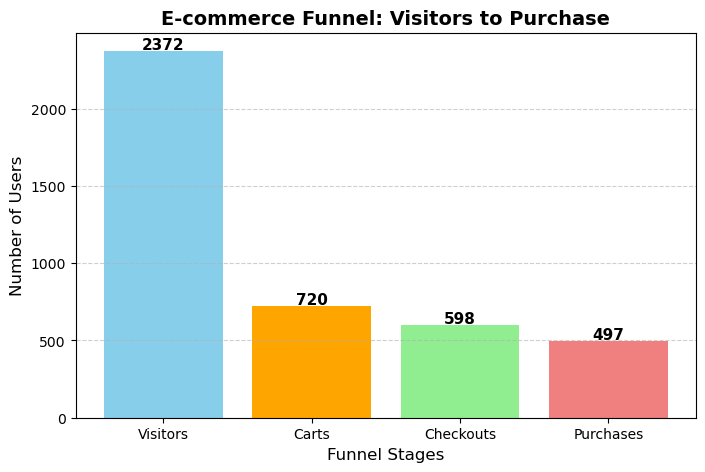

In [157]:
visitors_count = len(all_data)
cart_count = all_data['cart_time'].notna().sum()
checkout_count = all_data['checkout_time'].notna().sum()
purchase_count = all_data['purchase_time'].notna().sum()

# Store counts in a list
counts = [visitors_count, cart_count, checkout_count, purchase_count]
stages = ['Visitors', 'Carts', 'Checkouts', 'Purchases']

# Plot the funnel
plt.figure(figsize=(8, 5))
plt.bar(stages, counts, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])

# Add titles and labels
plt.title('E-commerce Funnel: Visitors to Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Funnel Stages', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Show counts on top of the bars
for i, value in enumerate(counts):
    plt.text(i, value + 10, str(value), ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()